In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in and clean data

In [ ]:
N: Column: Description

1: AGE: age in years
2: SEX: sex (1 = male; 0 = female)
3: CP: chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
4: TRESTBPS: resting blood pressure (in mm Hg on admission to the hospital)
5: CHOL: serum cholestoral in mg/dl
6: FBS: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7: RESTECG: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8: THALACH: maximum heart rate achieved
9: EXANG: exercise induced angina (1 = yes; 0 = no)
10: OLDPEAK = ST depression induced by exercise relative to rest
11: SLOPE: the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
12: CA: number of major vessels (0-3) colored by flourosopy
13: THAL: 3 = normal; 6 = fixed defect; 7 = reversable defect
14: NUM: diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1,2,3,4: > 50% diameter narrowing
    presence (values 1,2,3,4) absence (value 0)

In [2]:
col_names = ["AGE", "GENDER", "CP", "TRESTBPS", "CHOL", "FBS", "RESTECG", "THALACH", "EXANG", "OLDPEAK", "SLOPE", "CA", "THAL", "NUM"]
col_types = {"AGE": np.float_, "GENDER": np.int_ , "CP": np.int_, "TRESTBPS": np.float_, "CHOL": np.float_,
             "FBS": np.int_, "RESTECG": np.int_, "THALACH": np.float_, "EXANG": np.int_, "OLDPEAK": np.float_,
             "SLOPE": np.int_, "CA": np.int_, "THAL": np.int_, "NUM": np.int_}
health_data = pd.read_csv("Data/processed.cleveland.data", names = col_names)
print(health_data.values)

[[63.0 1.0 1.0 ..., '0.0' '6.0' 0]
 [67.0 1.0 4.0 ..., '3.0' '3.0' 2]
 [67.0 1.0 4.0 ..., '2.0' '7.0' 1]
 ..., 
 [57.0 1.0 4.0 ..., '1.0' '7.0' 3]
 [57.0 0.0 2.0 ..., '1.0' '3.0' 1]
 [38.0 1.0 3.0 ..., '?' '3.0' 0]]


In [3]:
for name in col_names:
    data_type = col_types[name]
    print(name+":", health_data[name].dtype)
    

AGE: float64
GENDER: float64
CP: float64
TRESTBPS: float64
CHOL: float64
FBS: float64
RESTECG: float64
THALACH: float64
EXANG: float64
OLDPEAK: float64
SLOPE: float64
CA: object
THAL: object
NUM: int64


In [4]:
print("CA")
print(health_data.CA.value_counts())
print("THAL")
print(health_data.THAL.value_counts())

CA
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: CA, dtype: int64
THAL
3.0    166
7.0    117
6.0     18
?        2
Name: THAL, dtype: int64


In [5]:
health_data.loc[health_data.CA == "?", "CA"] = "-1"

In [6]:
health_data.loc[health_data.THAL == "?", "THAL"] = "-1"

In [7]:
print("CA")
print(health_data.CA.value_counts())
print("THAL")
print(health_data.THAL.value_counts())

CA
0.0    176
1.0     65
2.0     38
3.0     20
-1       4
Name: CA, dtype: int64
THAL
3.0    166
7.0    117
6.0     18
-1       2
Name: THAL, dtype: int64


In [8]:
health_data.values

array([[63.0, 1.0, 1.0, ..., '0.0', '6.0', 0],
       [67.0, 1.0, 4.0, ..., '3.0', '3.0', 2],
       [67.0, 1.0, 4.0, ..., '2.0', '7.0', 1],
       ..., 
       [57.0, 1.0, 4.0, ..., '1.0', '7.0', 3],
       [57.0, 0.0, 2.0, ..., '1.0', '3.0', 1],
       [38.0, 1.0, 3.0, ..., '-1', '3.0', 0]], dtype=object)

In [9]:
for name in col_names:
    data_type = col_types[name]
    print(name+":", health_data[name].dtype)

AGE: float64
GENDER: float64
CP: float64
TRESTBPS: float64
CHOL: float64
FBS: float64
RESTECG: float64
THALACH: float64
EXANG: float64
OLDPEAK: float64
SLOPE: float64
CA: object
THAL: object
NUM: int64


In [10]:
health_data.CA = health_data.CA.astype(np.float_)
health_data.THAL = health_data.THAL.astype(np.float_)
health_data = health_data.astype(col_types)
health_data.dtypes

AGE         float64
GENDER        int64
CP            int64
TRESTBPS    float64
CHOL        float64
FBS           int64
RESTECG       int64
THALACH     float64
EXANG         int64
OLDPEAK     float64
SLOPE         int64
CA            int64
THAL          int64
NUM           int64
dtype: object

In [11]:
health_data.values

array([[ 63.,   1.,   1., ...,   0.,   6.,   0.],
       [ 67.,   1.,   4., ...,   3.,   3.,   2.],
       [ 67.,   1.,   4., ...,   2.,   7.,   1.],
       ..., 
       [ 57.,   1.,   4., ...,   1.,   7.,   3.],
       [ 57.,   0.,   2., ...,   1.,   3.,   1.],
       [ 38.,   1.,   3., ...,  -1.,   3.,   0.]])

# Exploratory Data Analysis

For integer variables, create frequency tables.

For floating point variables, look at max, min, range, histogram, correlation plot 

In [12]:
for name in health_data.columns:
    if health_data[name].dtype == np.int_:
        print(health_data[name].value_counts())

1    206
0     97
Name: GENDER, dtype: int64
4    144
3     86
2     50
1     23
Name: CP, dtype: int64
0    258
1     45
Name: FBS, dtype: int64
0    151
2    148
1      4
Name: RESTECG, dtype: int64
0    204
1     99
Name: EXANG, dtype: int64
1    142
2    140
3     21
Name: SLOPE, dtype: int64
 0    176
 1     65
 2     38
 3     20
-1      4
Name: CA, dtype: int64
 3    166
 7    117
 6     18
-1      2
Name: THAL, dtype: int64
0    164
1     55
2     36
3     35
4     13
Name: NUM, dtype: int64


In [13]:
health_data.describe()

,AGE,GENDER,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.650165,4.696370,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.950632,1.988432,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


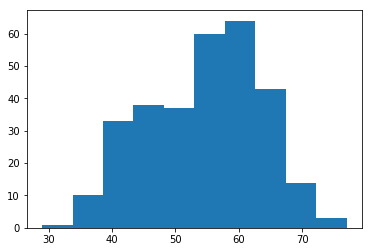

In [14]:
#histogram
fig, ax = plt.subplots()
ax.hist(health_data["AGE"].values)
plt.show()